# 1-)📍 NumPy ile Broadcasting, Slicing ve Vektörizasyon —  Öğretici Not Defteri

#  2) 📌 Giriş Bölümü

📎 Amaç ve kazanımlar:

NumPy’nin neden hızlı olduğunu anlamak

For loop → vectorization karşılaştırması

Slicing ile veri manipülasyonu

Broadcasting ile matrislerde otomatik boyut genişletme

# 🧩 3) NumPy Temelleri

In [2]:
import numpy as np
import time

a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

# 4-) Slicing

In [4]:
a = np.arange(1,17).reshape(4,4)
a[1:3,1:3]
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [7]:
print("İlk Sütun")
print(a[:,0]) # İlk sütun

print("İlk satır")
print(a[0,:])# ilk satır

print("Her 2 eleman")
print(a[::2,::2]) # Her 2 eleman

İlk Sütun
[ 1  5  9 13]
İlk satır
[1 2 3 4]
Her 2 eleman
[[ 1  3]
 [ 9 11]]


# 5-) Broadcasting

In [9]:
a = np.ones((3,3))
b = np.array([1,2,3]) # sahep -->(3,)
a + b

array([[2., 3., 4.],
       [2., 3., 4.],
       [2., 3., 4.]])

In [10]:
a +10

array([[11., 11., 11.],
       [11., 11., 11.],
       [11., 11., 11.]])

# ✔ RGB parlaklık artırma örneği

In [16]:
image = np.random.randint(0,255,(100,100,3))
bright = image + np.array([30,30,30])
print("image")
print(image)
print("Parlak hali")
print(bright)

image
[[[147 179 174]
  [147 191 191]
  [167 162  78]
  ...
  [206 192  83]
  [178  82  78]
  [199 102 128]]

 [[210 252  60]
  [ 78 145  57]
  [150 159  92]
  ...
  [221  60 133]
  [105 149 123]
  [208 157  10]]

 [[239   9  53]
  [225 217 117]
  [253  83 137]
  ...
  [221 217 124]
  [  6  24 235]
  [ 32  45  19]]

 ...

 [[210 229 127]
  [  5 250  82]
  [152  77 154]
  ...
  [113  26  23]
  [148 186 193]
  [ 85 141  97]]

 [[135 175  74]
  [129 148 182]
  [196  16 103]
  ...
  [167  87 115]
  [189  31  88]
  [177 113 186]]

 [[245 243 171]
  [ 74 118  12]
  [ 54 172 122]
  ...
  [216 112 185]
  [209   8  96]
  [110  75   6]]]
Parlak hali
[[[177 209 204]
  [177 221 221]
  [197 192 108]
  ...
  [236 222 113]
  [208 112 108]
  [229 132 158]]

 [[240 282  90]
  [108 175  87]
  [180 189 122]
  ...
  [251  90 163]
  [135 179 153]
  [238 187  40]]

 [[269  39  83]
  [255 247 147]
  [283 113 167]
  ...
  [251 247 154]
  [ 36  54 265]
  [ 62  75  49]]

 ...

 [[240 259 157]
  [ 35 280 112]
  

# 6) Vektörizasyon

In [17]:
arr = np.random.rand(10_000_000)
out = np.zeros_like(arr)

for i in range(len(arr)):
  out[i] = arr[i]*2

start = time.time()
end = time.time()
print("Loop süresi: ",end-start)

Loop süresi:  4.1484832763671875e-05


# Daha iyi Yöntem

In [18]:
start = time.time()
out =arr*2
end =time.time()
print("Vectorize süresi: ",end-start)

Vectorize süresi:  0.027350425720214844


# 8-) Pratik Uygulama: Görüntü Üzerinde Broadcasting + Vectorize

# MNIST Görüntü Seçme ve İşleme

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

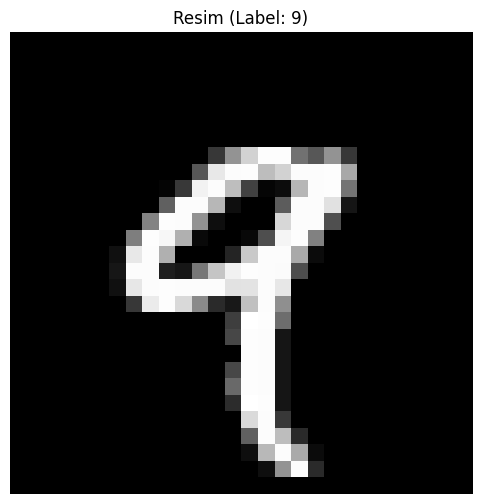

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Veri setini yükleme
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Bir adet resim seçelim
img = x_train[4]

plt.figure(figsize=(12,6))
plt.title(f"Resim (Label: {y_train[4]})")
plt.imshow(img,cmap="gray")
plt.axis("off")

# 8.1-) Parlaklık Artırma(Broadcasting)

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

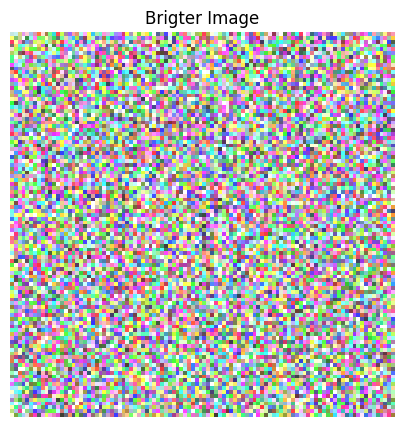

In [23]:
brighter = image +50
brighter = np.clip(brighter,0,255)

plt.figure(figsize=(5,5))
plt.title("Brigter Image")
plt.imshow(brighter,cmap="gray")
plt.axis("off")

# 8.2-) Thresholding

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

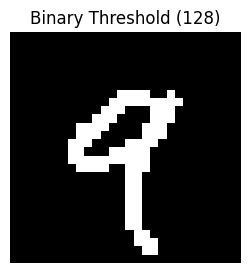

In [29]:
binary = (img>128)*255
plt.figure(figsize=(3,3))
plt.title("Binary Threshold (128)")
plt.imshow(binary, cmap="gray")
plt.axis("off")
# Tüm 28×28 matris tek satırda dönüştürülüyor


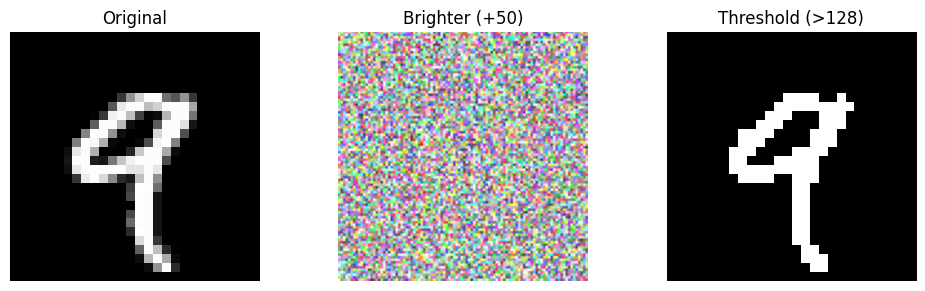

In [30]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Brighter (+50)")
plt.imshow(brighter, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Threshold (>128)")
plt.imshow(binary, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


# 9-) Sonuç -Öğrenilenler


- Slicing ile matris manipülasyonu

- Broadcasting ile otomatik boyut uyumu

- Vektörizasyon sayesinde dev hız

